In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import make_biclusters, make_blobs, make_classification
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sample = make_classification(n_samples =75, n_features=2,n_redundant=0)
x = [sample[0][n][0] for n in range(0, len(sample[0]))]
y = [sample[0][n][1] for n in range(0, len(sample[0]))]
group = [sample[1][n] for n in range(0, len(sample[0]))]
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df['group'] = group

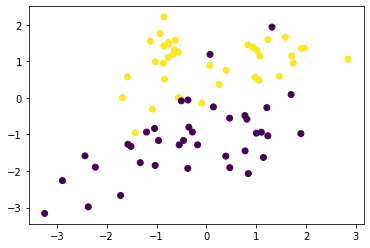

In [3]:
plt.scatter(x=x,y=y, c=group)

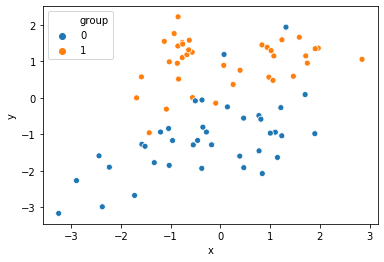

In [4]:
sns.scatterplot(x='x',y='y',hue='group',data=df)

In [5]:
x, y = make_blobs(cluster_std=2)

In [34]:
def graph_classes(x,y):
    fig = plt.figure(figsize=(8,8))
    for n in set(y):
        plt.scatter(x[y==n,0],x[y==n,1])

In [73]:
for n in set(y):
    print(n)

0
1
2


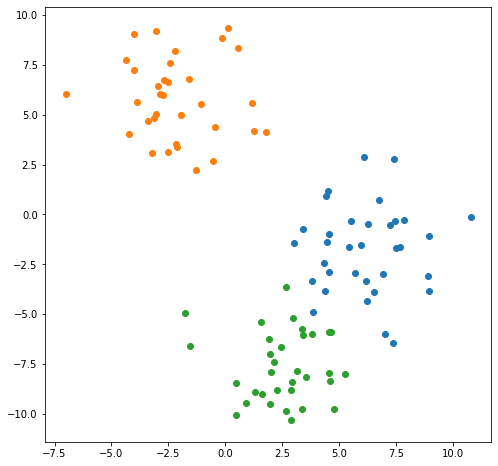

In [35]:
graph_classes(x,y)

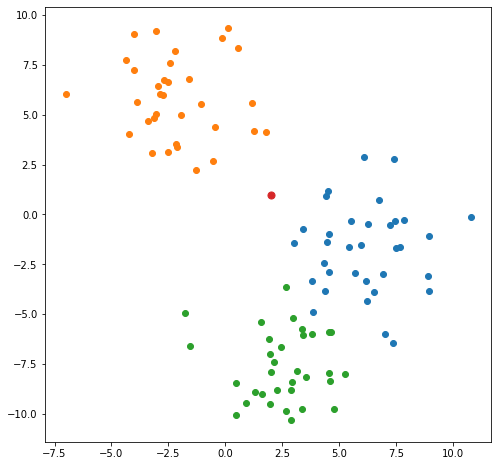

In [36]:
graph_classes(x,y)
plt.scatter(2,1,50)

In [2]:
def find_closest_points(target, points, n_closest):
    distances = []
    for n in range(0,len(points)):
        dist = (points[n][0]-target[0])**2 + (points[n][1]-target[1])**2
        distances.append((n,dist))
    return [n[0] for n in sorted(distances, key = lambda x: x[1])[:n_closest]]

In [25]:
x[find_closest_points((2,1),x,3),0]

array([3.42720399, 4.40594989, 4.51750666])

In [3]:
def graph_w_close_points(x,y,target,n_closest):
    fig = plt.figure(figsize=(8,8))
    for n in set(y):
        plt.scatter(x[y==n,0],x[y==n,1])
    closest = find_closest_points(target, x, n_closest)
    plt.scatter(target[0],target[1])
    plt.scatter(x[closest,0],x[closest,1],marker="o",s=100,facecolors='none',edgecolors='r',linewidths=1)

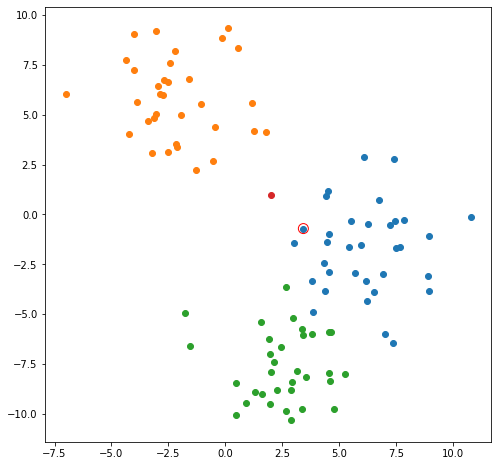

In [50]:
graph_w_close_points(x,y,(2,1),1)

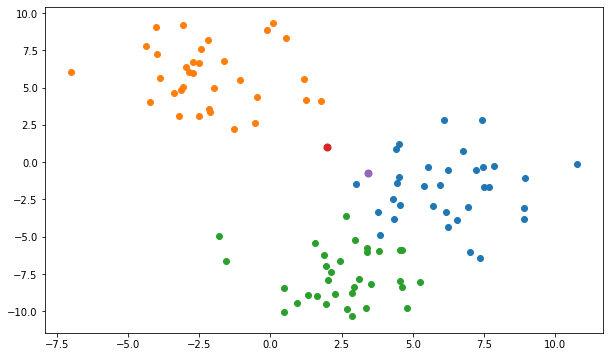

In [20]:
graph_classes(x,y)
plt.scatter(2,1,50)
plt.scatter(3.42720399, -0.70842569,50)

In [87]:
adj_x = np.concatenate([x[y==0],np.array([[0,0]]),x[y==2]])
adj_y = np.array([0]*len(x[y==0])+[1]+[2]*len(x[y==1]))

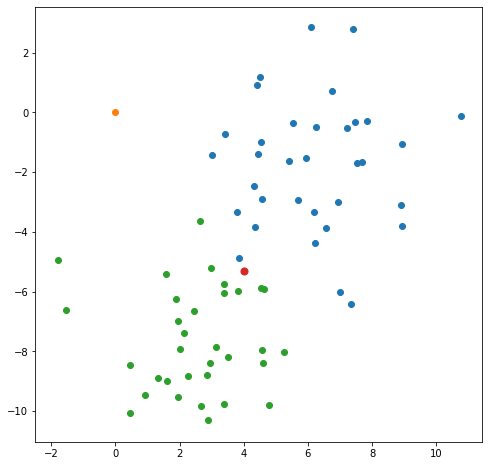

In [105]:
graph_classes(adj_x,adj_y)
plt.scatter(4,-5.3,50)

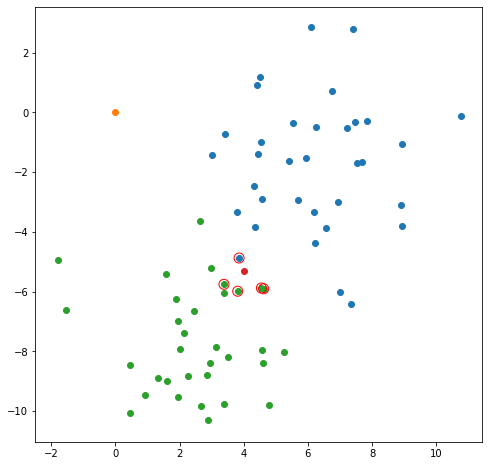

In [107]:
graph_w_close_points(adj_x,adj_y,(4,-5.3),5)

In [4]:
knn= KNeighborsClassifier()
knn.fit(x,y)

from matplotlib.colors import ListedColormap
h=.2
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
graph_classes(x,y)

plt.pcolormesh(xx, yy, Z,cmap=cmap_light)


NameError: name 'x' is not defined

In [5]:
def graph_w_regions(x,y,target,n_neighbors):
    fig = plt.figure(figsize=(8,8))
    knn= KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x,y)
    h=.05
    cmap_light = ListedColormap(['#AAAAFF','#FFAAAA','#AAFFAA'])
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    graph_classes(x,y)

    plt.pcolormesh(xx, yy, Z,cmap=cmap_light)
    plt.scatter(x[y==0,0],x[y==0,1],c='b')
    plt.scatter(x[y==1,0],x[y==1,1],c='orange')
    plt.scatter(x[y==2,0],x[y==2,1],c='g')

    plt.scatter(target[0],target[1])

<Figure size 576x576 with 0 Axes>

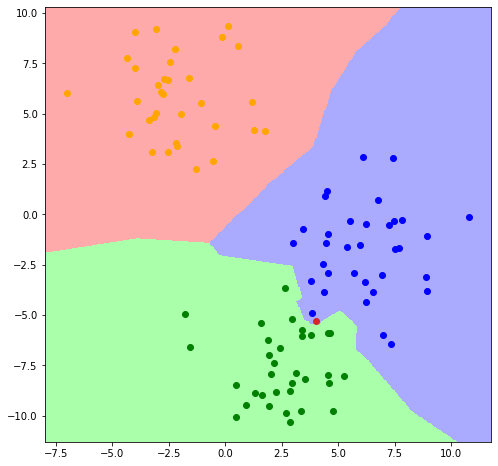

In [139]:
graph_w_regions(x,y,(4,-5.3),1)

<Figure size 576x576 with 0 Axes>

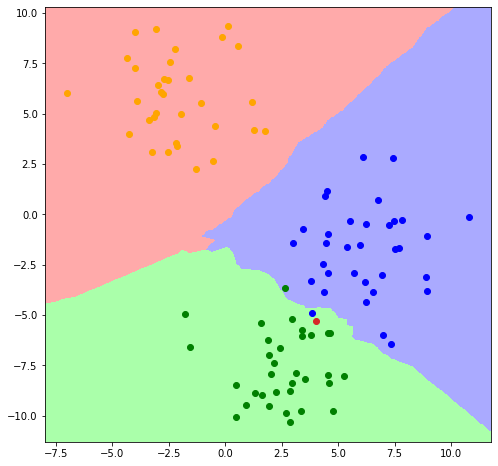

In [140]:
graph_w_regions(x,y,(4,-5.3),5)

In [35]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=75,n_features=1,noise=20)

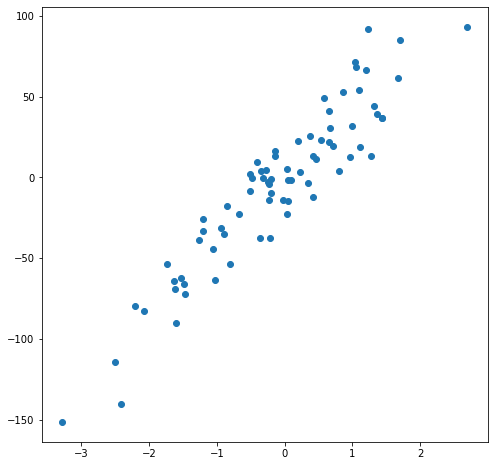

In [36]:
plt.figure(figsize=(8,8))
plt.scatter(x,y)

In [20]:
def find_closest_x(value, x_list,n_points):
    distances = []
    for n in range(0,len(x_list)):
        dist = (x_list[n]-value)**2
        distances.append((n,dist))
    return [n[0] for n in sorted(distances, key = lambda x: x[1])[:n_points]]

In [37]:
find_closest_x(1,x,1)

[54]

In [38]:
x[54]

array([0.98796541])

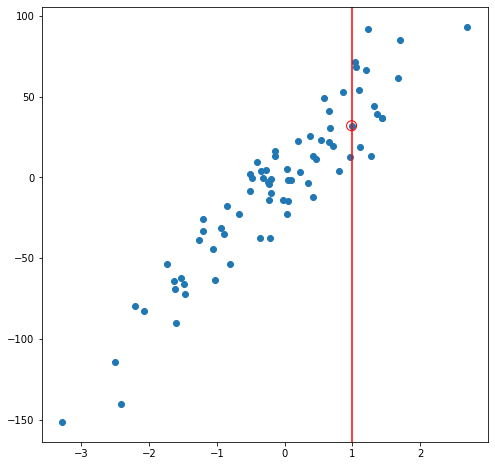

In [45]:
plt.figure(figsize=(8,8))
plt.scatter(x,y)
plt.axvline(1,c='r')
plt.scatter(x[find_closest_x(1,x,1)],y[find_closest_x(1,x,1)],
            marker="o",s=100,facecolors='none',edgecolors='r',linewidths=1)

In [46]:
def knn_reg_m_points(x,y,target,n_points):
    plt.figure(figsize=(8,8))
    plt.scatter(x,y)
    plt.axvline(target,c='r')
    indexes = find_closest_x(target,x,n_points)
    for index in indexes:
        plt.scatter(x[index],y[index],marker="o",s=100,facecolors='none',edgecolors='r',linewidths=1)
        

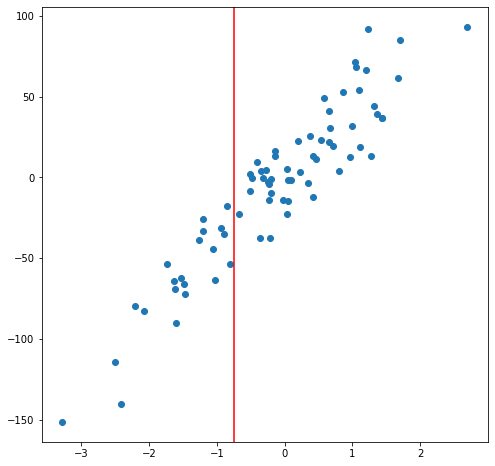

In [54]:
knn_reg_m_points(x,y,-.75,0)

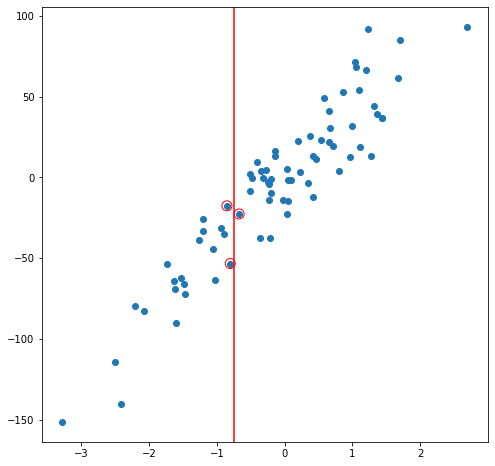

In [60]:
knn_reg_m_points(x,y,-.75,3)


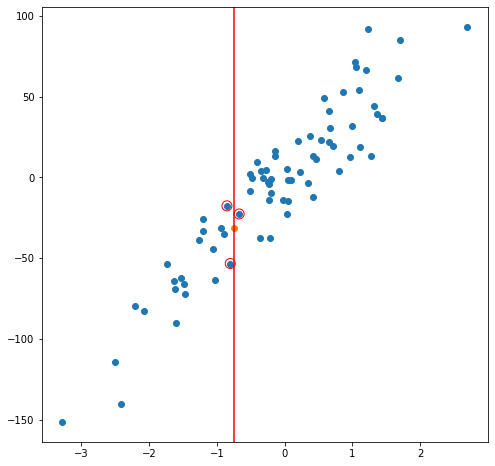

In [61]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(x,y)

knn_reg_m_points(x,y,-.75,3)
plt.scatter(-.75,knn_reg.predict([[-.75]]))

In [73]:
def knn_reg_n_points_pred(x,y,targets,n_points):
    knn_reg = KNeighborsRegressor(n_neighbors=n_points)
    knn_reg.fit(x,y)
    
    plt.figure(figsize=(8,8))
    plt.scatter(x,y)
    for target in targets:
        plt.axvline(target,c='r')
        indexes = find_closest_x(target,x,n_points)
        for index in indexes:
            plt.scatter(x[index],y[index],marker="o",s=100,facecolors='none',edgecolors='r',linewidths=1)
        plt.scatter(target,knn_reg.predict([[target]]),c='r')

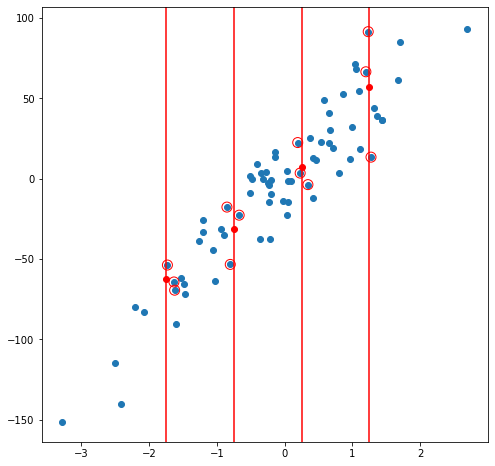

In [75]:
knn_reg_n_points_pred(x,y,[-1.75,-.75,.25,1.25],3)

In [88]:
def knn_reg_graph(x,y,n_points):
    knn_reg = KNeighborsRegressor(n_neighbors=n_points)
    knn_reg.fit(x,y)
    
    plt.figure(figsize=(8,8))
    plt.scatter(x,y)
    xx = np.linspace(min(x),max(x),100)
    yy = [knn_reg.predict([[point]]) for point in xx]
    plt.plot(xx,yy,c='r')

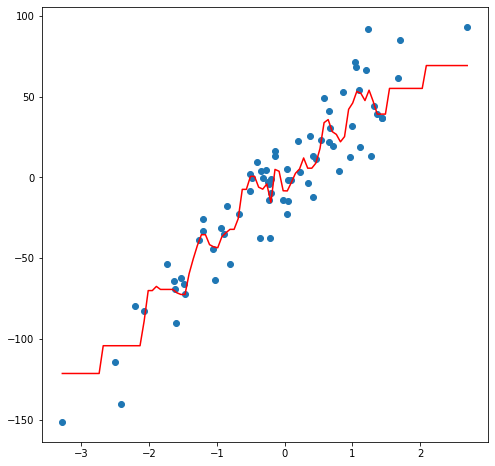

In [89]:
knn_reg_graph(x,y,4)

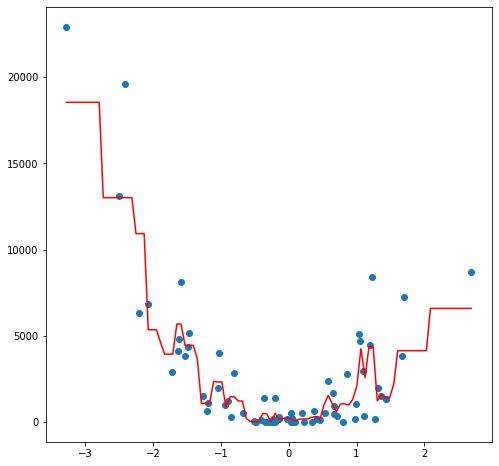

In [99]:
knn_reg_graph(x,y*y,3)

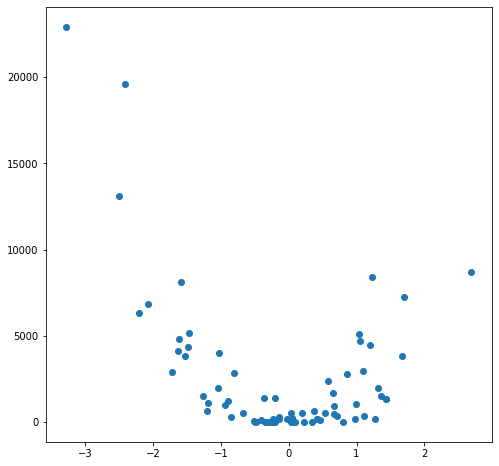

In [92]:
plt.figure(figsize=(8,8))
plt.scatter(x,y*y)

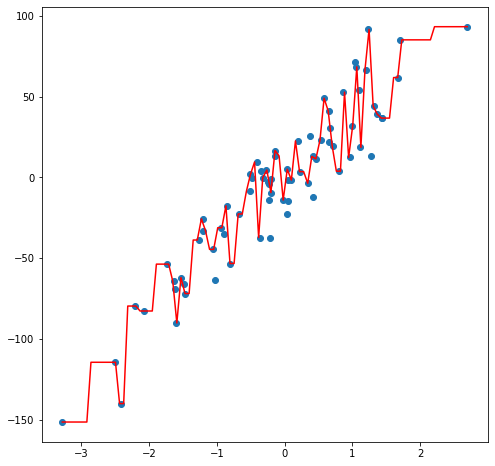

In [95]:
knn_reg_graph(x,y,1)

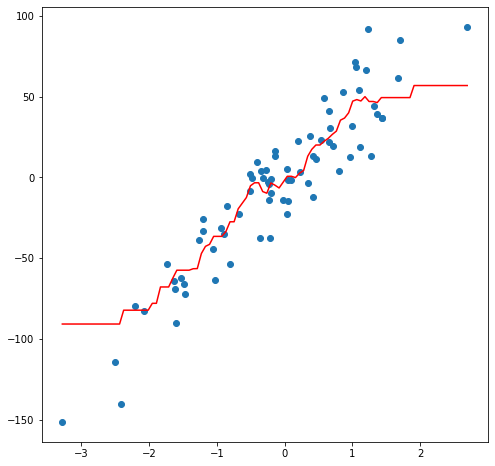

In [96]:
knn_reg_graph(x,y,10)

In [100]:
def knn_reg_graph_weight(x,y,n_points):
    knn_reg = KNeighborsRegressor(n_neighbors=n_points,weights='distance')
    knn_reg.fit(x,y)
    
    plt.figure(figsize=(8,8))
    plt.scatter(x,y)
    xx = np.linspace(min(x),max(x),100)
    yy = [knn_reg.predict([[point]]) for point in xx]
    plt.plot(xx,yy,c='r')

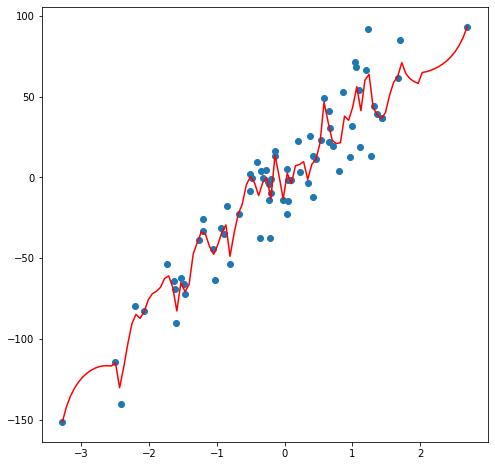

In [102]:
knn_reg_graph_weight(x,y,5)